In [35]:
import Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW

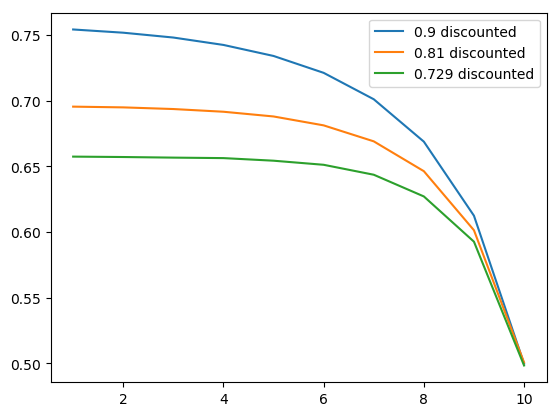

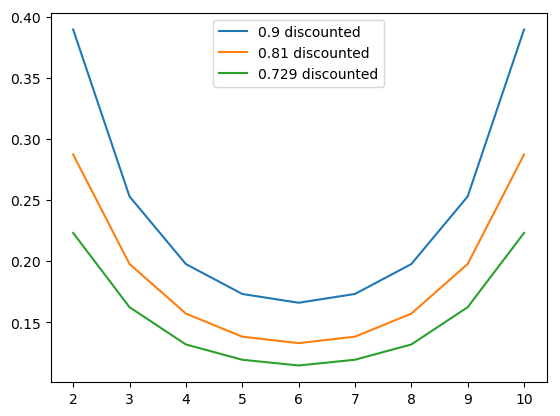

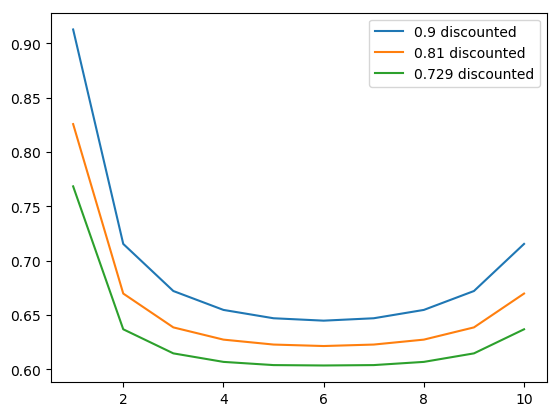

In [44]:
function no_win(p,g)
    l = length(p)
    gs = reverse(g(p))
    result = ones(l)
    for i = 2:l
        for j=i:l
            result[i-1] = result[i-1]*gs[j]
        end
    end
    return reverse(result)
end


function create_obj(u,g)
    obj(p) = -1*u(p,g)
    return obj
end


function create_plot(n,l,u,g,beta)
    p0 = .5*ones(n)
    results = zeros(l,n)
    xs = collect( 1:length(p0) )
    
    #solve the problem for different discount factors
    for i=1:l
        u2(p,g) = sum((beta^i*ones(length(p))).^collect(1:length(p)) .*u(p,g))
        obj(p) = create_obj(u2,g)(p)
        res = optimize(obj,p0)
        ps = res.minimizer
        
        results[i,:] = ps
        figure(1)
        plot(xs, ps, label="$(round(beta^i,digits=3)) discounted")
        
        trans =  abs.(fft(ps))
        figure(2)
        plot(xs[2:end], trans[2:end], label="$(round(beta^i,digits=3)) discounted")
        
        figure(3)
        plot(xs, abs.(ifft(trans)) , label="$(round(beta^i,digits=3)) discounted")
        
    end
    figure(1)
    legend()
    show()
    savefig("results2.png")
    
    
    figure(2)
    legend()
    show()
    savefig("results3.png")
    
    figure(3)
    legend()
    show()
    savefig("results3.png")
    
end

BETA = .9

f1(p) = clamp!(p,0, 1)


u1(p,g) = p.*(ones(size(p)) - g(p)).*no_win(p,g)


create_plot(10,3,u1,f1,BETA)
